In [157]:
import numpy as np # scientific computing with Python
import pandas as pd # data processing and data analysis tools

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns


In [158]:
# https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data

train = pd.read_json("../Two Sigma/train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [159]:
test = pd.read_json("../Two Sigma/test.json")
test.head().T

,0,1,100,1000,100000
bathrooms,1,1,1,1,2
bedrooms,1,2,1,2,2
building_id,79780be1514f645d7e6be99a3de696c5,0,3dbbb69fd52e0d25131aa1cd459c87eb,783d21d013a7e655bddc4ed0d461cc5e,6134e7c4dd1a98d9aee36623c9872b49
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-03 04:29:40,2016-06-11 06:17:35,2016-04-12 05:24:17
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,New York chic has reached a new level ...,Step into this fantastic new Construction in t...,"~Take a stroll in Central Park, enjoy the ente..."
display_address,Suffolk Street,Thompson Street,101 East 10th Street,South Third Street\r,"Midtown West, 8th Ave"
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Doorman, Elevator, No Fee]","[Roof Deck, Balcony, Elevator, Laundry in Buil...","[Common Outdoor Space, Cats Allowed, Dogs Allo..."
latitude,40.7185,40.7278,40.7306,40.7109,40.765
listing_id,7142618,7210040,7103890,7143442,6860601
longitude,-73.9865,-74,-73.989,-73.9571,-73.9845


In [160]:
train.shape

(49352, 15)

In [161]:
test.shape

(74659, 14)

In [162]:
# info method provides information about dataset like 
# total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [163]:
# How many columns with different datatypes are there?
train.get_dtype_counts()

float64    3
int64      3
object     9
dtype: int64

In [164]:
# Describe gives statistical information about numerical columns in the dataset
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


There is max of bathrooms is 10 and the max of bedrooms is 8. 
The min of bathrooms and bedrooms are 0. 
Min of latitude is 0 and max is 44.88. Latitude is mostly around 40.7. 
Min of longitude is -118.27 and max is 0. 
Most of longitude is around -73.9. Min of prince is 43 and max is 4.49MM. 
It is very likely latitude, longitude and price has ourliers.

In [165]:
# distribution of interest_level
train.interest_level.value_counts(dropna = False)

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

The response variable interest_level is character with 3 levels, there is no missing value.

The 1st and 99th percentile of latitude is 40.6404 and 40.862047. So it is reasonable of thinking 0 and 44.8835 as ourliers. We will floor and cap latitude by its 1st and 99th percentile.

[40.6404, 40.86197203]


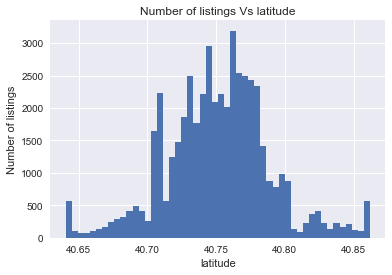

In [167]:
lat_pct = np.percentile(train.latitude, [1, 99]).tolist()
print(lat_pct)

train['latitude'] = np.where(train['latitude'] < lat_pct[0], lat_pct[0], 
                             np.where(train['latitude'] > lat_pct[1], lat_pct[1], train['latitude']))

train['latitude'].hist(bins = 50)
plt.title("Number of listings Vs latitude");
plt.ylabel("Number of listings")
plt.xlabel("latitude");

The 1st and 99th percentile of longitude is -74.0162 and -73.852651. So we will also floor and cap at these two numbers.

[-74.0162, -73.852651]


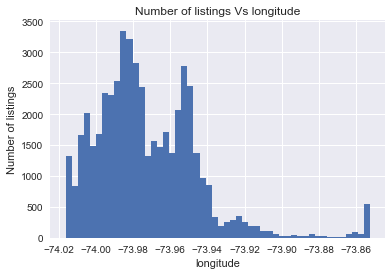

In [168]:
long_pct = np.percentile(train.longitude, [1, 99]).tolist()
print(long_pct)

train['longitude'] = np.where(train['longitude'] < long_pct[0], long_pct[0], 
                             np.where(train['longitude'] > long_pct[1], long_pct[1], train['longitude']))
train['longitude'].hist(bins = 50)
plt.title("Number of listings Vs longitude");
plt.ylabel("Number of listings")
plt.xlabel("longitude");

In [ ]:
# Latitude and Longitude using Google Earth
# Ref: https://www.kaggle.com/justindeed/google-earth-exploration

import json
import gpxpy as gpx
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print(row['latitude'], row['longitude'])
    if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth
            gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
            gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()
print ('Created GPX:')

# Install google earth desktop 
# Open google earth pro 
# drag n drop generated gpx file on google earth window


<img src='../Two Sigma/Mapped_Geo_Cordinates.jpg'>

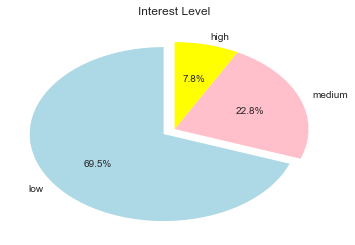

In [170]:
#target variable
labels = ["low","medium","high"]
piesizes = train.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightblue','pink','yellow']
patches,texts,autotexts= plt.pie(piesizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", startangle=90)
plt.title("Interest Level")
plt.show()

Very few listings are with high interest.

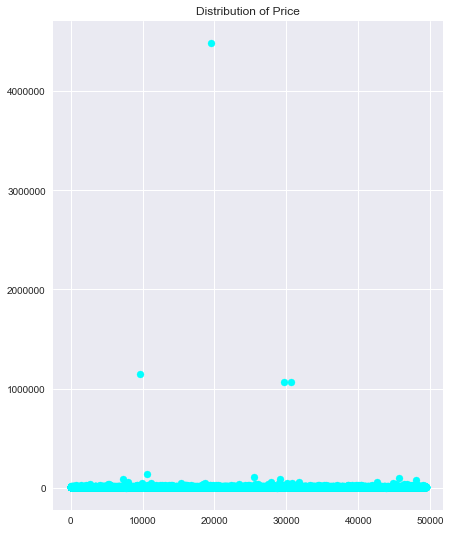

In [171]:
plt.figure(figsize=(7, 9))
plt.scatter(range(train.shape[0]), train["price"].values,color='cyan')
plt.title("Distribution of Price");

Looks like there are some outliers in price column. lets remove them first.

[1475.0, 1800.0, 6895.0, 13000.0]


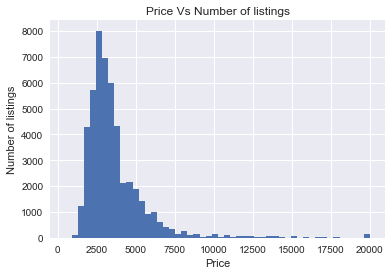

In [173]:
price_pct = np.percentile(train.price, [1, 5, 95, 99]).tolist()
print(price_pct)

train['price'] = np.where(train['price'] < 500, 500, np.where(train['price'] > 20000, 20000, train['price']))

train.price.hist(bins = 50)
plt.title("Price Vs Number of listings");
plt.xlabel("Price")
plt.ylabel("Number of listings");

The 1st and 99th percentile of price is 1475 and 13000. To be reasonable, we can floor and cap at 500 to 20000 for price.

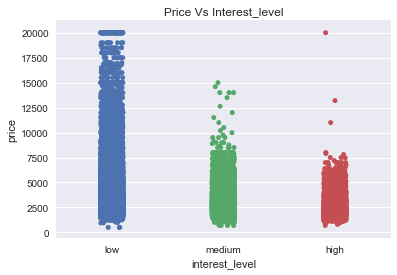

In [174]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

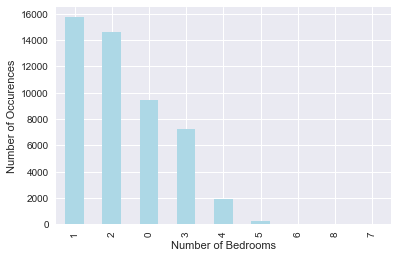

In [175]:
train["bedrooms"].value_counts().plot(kind='bar',color='lightblue')
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Bedrooms");

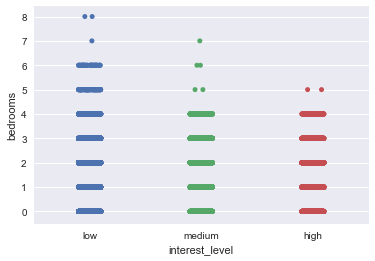

In [176]:
sns.stripplot(y="bedrooms", x="interest_level",data=train,jitter=True,order=order);

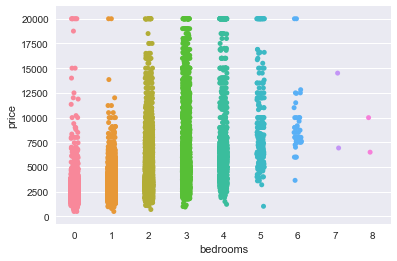

In [177]:
sns.stripplot(x="bedrooms", y="price",data=train,jitter=True);

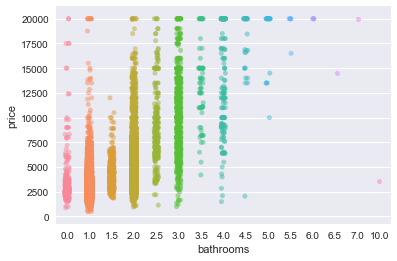

In [178]:
sns.stripplot(x="bathrooms", y="price",data=train, alpha=.5,jitter=True);

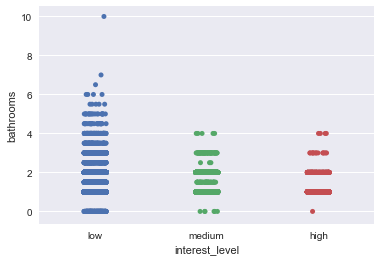

In [179]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

There is 1 house listing with 10 bathrooms. I think we can treat that as outlier. Lets remove it and plot again.

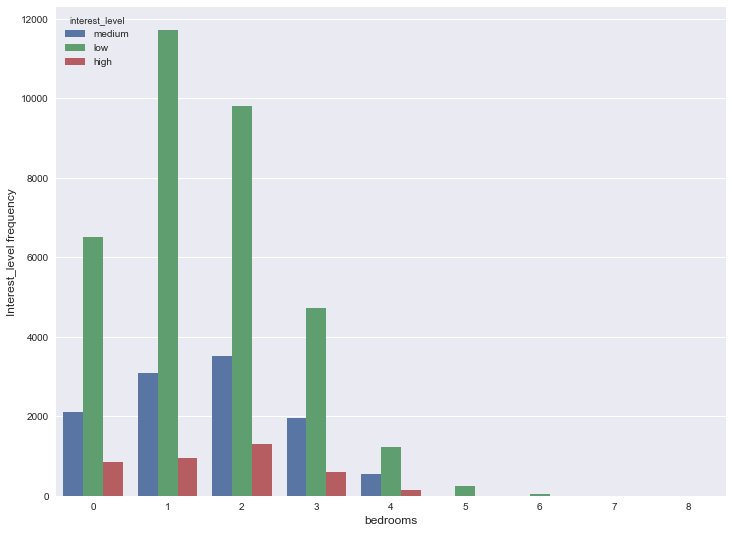

In [180]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Interest_level frequency', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

For each number of bedrooms(0, 1, 2...) we can count how many times high/low/medium occurs. From the graph below, the 1 bedroom occurs most, next by two bedrooms, and then 0 bedrooms.

#### thigs to add
Number of features to inetest level; 
Word Cloud 